In [1]:
def downloadDriveFile(file_id,file_name,file_extension):
  '''
  Allows charge of public files into colab's workspace
  '''
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$file_id -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$file_id -O "$file_name"."$file_extension" && rm -rf /tmp/cookies.txt

if 'google.colab' in str(get_ipython()):
    downloadDriveFile('1uY4ijPPkUxOO_BMwRnxuq10ucWCNkhGT','linalg_tools','py')

In [2]:
import numpy as np
import sympy as sp
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt
from matplotlib import cm

import linalg_tools

Example 7
=========

Consider a wireless communication channel with transmit power $p_t$. The received power pr in decibel ($dB$) is derived using the model:

$$p_r = p_t + K − 10\gamma log_{10} d$$

where K is a constant depending on the radio frequency and antennas gains, $\gamma$ is the path loss exponent, and $d$ in meters is the distance between the transmitter and the receiver. In a set of empirical measurements of $pr−pt$ in $dB$, given in the nex table, find constants $K$ and $\gamma$ to minimize the mean square error between the model and the empirical measurements.

<center>

| d     | $p_r$ - $p_t$ |
|------:|:-------------:|
| 10 m  | -70 dB    |
| 20 m  | -75 dB    |
| 50 m  | -90 dB    |
| 100 m | -110 dB   |
| 300 m | -125 dB   |

</center>

In [3]:
distances = np.array([[10], [20], [50], [100], [300]])
measures = np.array([[-70], [-75], [-90], [-110], [-125]])

distances_log = 10*np.log10(distances)

In [4]:
K, gamma = linalg_tools.least_squares(distances_log, measures)

synt_distances = np.linspace(distances[0], distances[-1], 20, endpoint=True)
opt_curve = K - 10*gamma*np.log10(synt_distances)

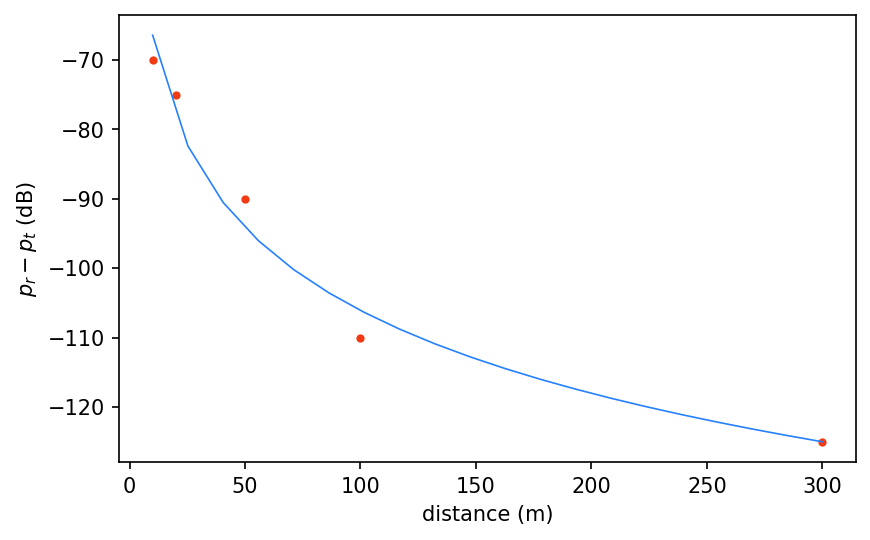

In [5]:
fig, ax = plt.subplots()

ax.scatter(distances, measures, color='#F23B13', linewidth=0.8, s=10, label='Experimental measures')
ax.plot(synt_distances, opt_curve, color='#2781FF', linewidth=0.8, label='Fitted curve')

ax.set_xlabel('distance (m)')
ax.set_ylabel('$p_r - p_t$ (dB)')

fig_dpi = 150
fig_width = 15./2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()

Problem 1
=========

Consider the function:

$$ 
f(\mathbf{x}) = \mathbf{x}^T \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix}\mathbf{x}
 + \mathbf{x}^T \begin{bmatrix} 3 \\ 1 \end{bmatrix} + 6
$$

In [6]:
x1, x2 = sp.symbols('x1 x2')
x_vect = sp.matrices.Matrix([[x1], [x2]])

f_x = x_vect.T*sp.matrices.Matrix([[3, 1], [1, 2]])*x_vect + x_vect.T*sp.matrices.Matrix([[3], [1]]) +np.full((1,1), 6)

In [7]:
jacobian_sym = sp.derive_by_array(f_x[0], [x1, x2])
hessian_sym = sp.derive_by_array(jacobian_sym, [x1, x2])

For matrix operations, it is better to have numpy's versions.

In [8]:
jacobian = sp.lambdify((x1, x2), jacobian_sym, modules='numpy')
hessian = sp.lambdify((x1, x2), hessian_sym, modules='numpy')

(a)
---
Find the gradient and Hessian of $f$ at $\mathbf{x} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

In [9]:
gradient_at_x = jacobian_sym.subs({x1: 1, x2: -1})
hessian_at_x = hessian_sym.subs({x1: 1, x2: -1})

print('The gradient at x is ', gradient_at_x)
print('The hessian at x is ', hessian_at_x)

The gradient at x is  [7, -1]
The hessian at x is  [[6, 2], [2, 4]]


(b)
---
Find the directional derivative of direction of maximum rate of increase with respect to a unit vector in direction of maximum rate of increase.

The direction of the maximum rate of increase of $f$ at $\mathbf{x} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$ is the direction of the gradient evaluated at that point. Then, the unit vector in such direction could be computed by just normalizing the gradient.

In [10]:
gradient_at_point = np.array(jacobian(1, -1))
max_incr_dir = gradient_at_point/np.linalg.norm(gradient_at_point)

Then, the directional derivative of direction of maximum rate of increase could be get both symbolic and analytic:

In [11]:
dir_derivative = jacobian_sym@max_incr_dir
dir_derivative

5.65685424949238*x1 + 1.41421356237309*x2 + 2.82842712474619

In [12]:
dir_derivative = gradient_at_point.T@max_incr_direction
print('The directional derivative at x is ', dir_derivative)

The directional derivative at x is  7.071067811865475


(c)
---
Find the point which satisfies the necessary and sufficient conditions of optimality for $f$.
Determine whether this point is a minimum, maximum, or saddle point.

The critical points could be finded making $\nabla f(\mathbf{x}) = 0$

In [13]:
linsolve(jacobian_sym, (x1, x2))

FiniteSet((-1/2, 0))

In [14]:
d1, d2 = sp.symbols('d1 d2')
direction = sp.matrices.Matrix([[d1], [d2]])

The second condition of optimalilty could be verified by the Hessian matrix.

In [15]:
H_crit_point = hessian(-1/2, 0)

In [16]:
f_eigvals, f_eigvects = np.linalg.eig(H_crit_point)
is_positive = np.allclose(f_eigvals > 0, True)
is_negative = np.allclose(f_eigvals < 0, True)
print('Is the Hessian matrix at the analysis point positive?', is_positive)
print('Is the Hessian matrix at the analysis point positive?', is_negative)

Is the Hessian matrix at the analysis point positive? True
Is the Hessian matrix at the analysis point positive? False


In [17]:
direction.T@np.array(H_crit_point)

Matrix([[6*d1 + 2*d2, 2*d1 + 4*d2]])

The product $\mathbf{d}^\mathrm{T} \; \nabla f(\mathbf{x^*})$ is positive in any direction $\mathbf{d}$ and $\mathbf{H}(\mathbf{x^*})$ is a positive semi-definite matrix. Then, $\mathbf{x^*} = \begin{bmatrix} -1/2 \\ 0 \end{bmatrix}$ satisfies the second-order neccesary condition of a local minimum point.

In [23]:
lam_f = sp.lambdify([x1, x2], f_x[0,0], modules=['numpy'])

step = 0.1
gradient_step = 0.1
x_vals = np.arange(-8, 8, step)
y_vals = np.arange(-8, 8, step)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals = lam_f(x_vals, y_vals)
gradient_x, gradient_y = np.gradient(f_vals, gradient_step)

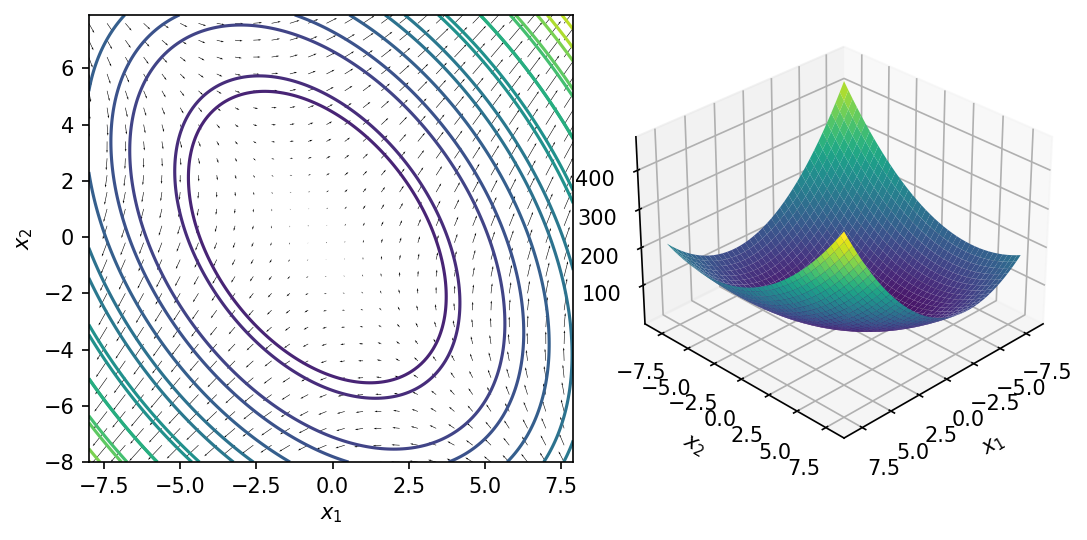

In [35]:
fig = plt.figure()
levels = 10

ax0 = fig.add_subplot(1, 2, 1)
ax0.contour (x_vals, y_vals, f_vals, levels) 

skip=(slice(None,None,6),slice(None,None,6))
ax0.contour (x_vals, y_vals, f_vals)
ax0.quiver(x_vals[skip], y_vals[skip], gradient_x[skip], gradient_y[skip],
 minshaft=1.5, minlength=1.5, units='dots', scale_units='dots', scale=3, angles='xy')
ax0.set_xlabel( '$x_1$' ) 
ax0.set_ylabel( '$x_2$' )

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(x_vals, y_vals, f_vals, cmap=cm.viridis,
                       linewidth=0.1, antialiased=True)
ax1.view_init(30, 45)
ax1.set_xlabel( '$x_1$' ) 
ax1.set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()

Problem 2
=========

Consider function $f (x_1, x_2) = x_1^2 x_2 + x_2^3 x_1$

(a)
----
Find the rate of increase of $f$ at point $x = \begin{bmatrix} 2 & 1 \end{bmatrix}^\mathrm{T}$ in the direction $d = \begin{bmatrix} 3 & 4 \end{bmatrix}^\mathrm{T}$

In [39]:
x1, x2 = sp.symbols('x1 x2')
f_x = x1**2*x2 + x2**3*x1
point = (2, 1)
direction = np.array([[3], [4]])

jacobian_sym = sp.derive_by_array(f_x, [x1, x2])
jacobian = sp.lambdify((x1, x2), jacobian_sym, modules='numpy')
gradient_at_point = np.array(jacobian(2, 1))
dir_derivative = gradient_at_point.T@direction

print('The rate of increase at the selected point and direction is ', dir_derivative)

The rate of increase at the selected point and direction is  [55]


(b)
----
In what direction does the function f decreases most rapidly at the point $ x = \begin{bmatrix} 2 & 1 \end{bmatrix}^T? $

In [44]:
jacobian_sym = sp.derive_by_array(f_x, [x1, x2])
hessian_sym = sp.derive_by_array(jacobian_sym, [x1, x2])

jacobian = sp.lambdify((x1, x2), jacobian_sym, modules='numpy')
hessian = sp.lambdify((x1, x2), hessian_sym, modules='numpy')

gradient_at_point = np.array(jacobian(2, 1))
max_incr_direction = gradient_at_point/np.linalg.norm(gradient_at_point)
min_incr_direction = max_incr_direction*-1
print('The direction of minimThe rate of increase at the selected point and direction is ', dir_derivative)

In [45]:
lam_f = sp.lambdify([x1, x2], f_x, modules=['numpy'])

step = 0.1
gradient_step = 0.1
x_vals = np.arange(-8, 8, step)
y_vals = np.arange(-8, 8, step)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals = lam_f(x_vals, y_vals)
gradient_x, gradient_y = np.gradient(f_vals, gradient_step)

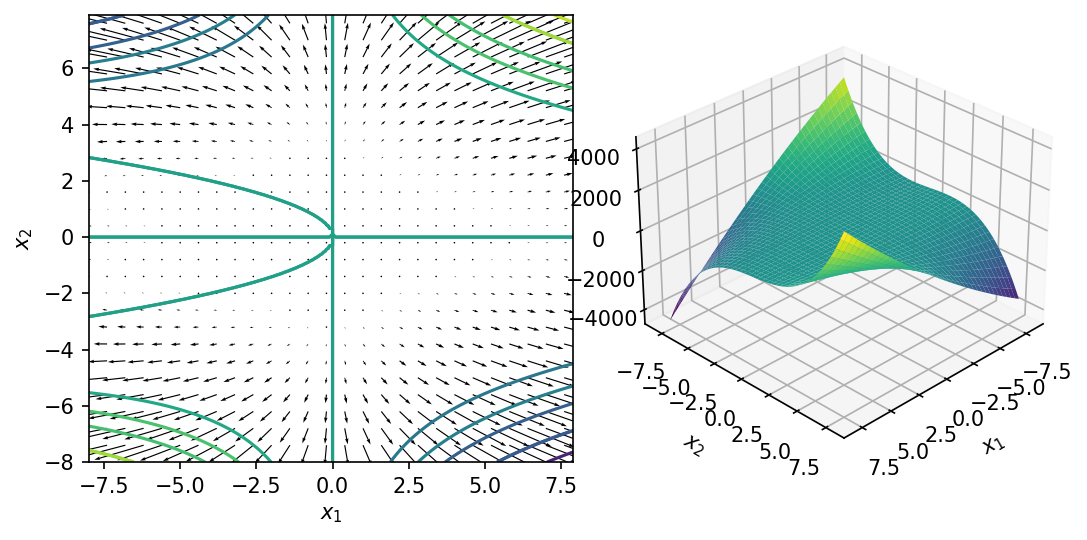

In [52]:
fig = plt.figure()
levels = 10

ax0 = fig.add_subplot(1, 2, 1)
ax0.contour (x_vals, y_vals, f_vals, levels) 

skip=(slice(None,None,6),slice(None,None,6))
ax0.contour (x_vals, y_vals, f_vals)
ax0.quiver(x_vals[skip], y_vals[skip], gradient_x[skip], gradient_y[skip],
 minshaft=1.5, minlength=1.5, units='width', scale_units='dots', scale=20, angles='xy')
ax0.set_xlabel( '$x_1$' ) 
ax0.set_ylabel( '$x_2$' )

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.plot_surface(x_vals, y_vals, f_vals, cmap=cm.viridis,
                       linewidth=0.1, antialiased=True)
ax1.view_init(30, 45)
ax1.set_xlabel( '$x_1$' ) 
ax1.set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()